2)Learning from data
1)Use the code given in listing 1 to generate data.

In [8]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . model_selection import train_test_split
from sklearn . linear_model import LinearRegression
# Generate 100 samples
n_samples = 100
# Generate X values ( uniformly distributed between 0 and 10)
X = 10 * np . random . rand ( n_samples , 1)
# Generate epsilon values ( normally distributed with mean 0 and standard deviation 15)
epsilon = np . random . normal (0 , 15 , n_samples )
# Generate Y values using the model Y = 3 + 3X + epsilon
Y = 3 + 2 * X + epsilon [: , np . newaxis ]


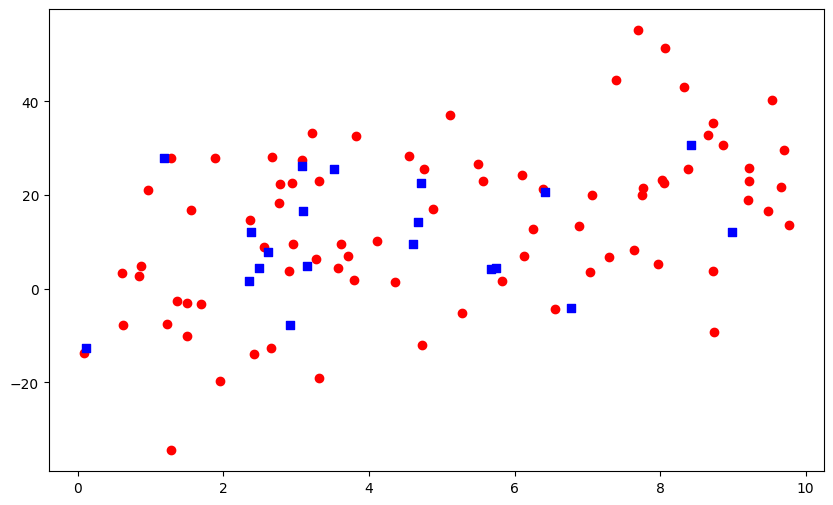

In [9]:
r = np . random . randint (104)
# Split the data into training and test sets (80% train , 20% test )
X_train , X_test , Y_train , Y_test = train_test_split (X , Y , test_size =0.2 , random_state = r )
# Plot the data points
plt . figure ( figsize =(10 , 6) )
plt . scatter ( X_train , Y_train , alpha =1 , marker ='o', color ='red', label ='Training Data ')
plt . scatter ( X_test , Y_test , alpha =1 , marker ='s', color ='blue', label ='Testing Data ')
plt . show ()

2)Run the code given in listing 2 multiple times and write down your observation. Why training and testing data is different in each run?

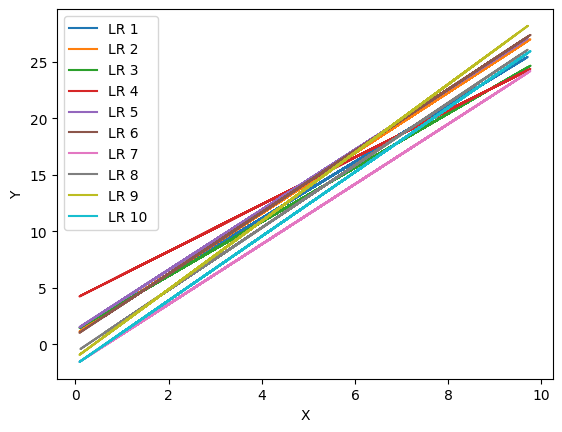

In [10]:
for i in range (10) : # Plotting 10 different instances
    X_train , X_test , Y_train , Y_test = train_test_split (X , Y , test_size =0.2 , random_state = np . random . randint(104) )
    model = LinearRegression ()
    model . fit ( X_train , Y_train )
    Y_pred_train = model . predict ( X_train )
    plt . plot ( X_train , Y_pred_train , label = f'LR {i+1} ')
plt . xlabel ('X')
plt . ylabel ('Y')
plt . legend ()
plt . show ()

3) Use the code given in listing 3 to fit a linear regression model. Why linear regression model is different from one instance to other instance ?



In [4]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . model_selection import train_test_split
from sklearn . linear_model import LinearRegression
# Generate 10000 samples
n_samples = 10000
# Generate X values ( uniformly distributed between 0 and 10)
X = 10 * np . random . rand ( n_samples , 1)
# Generate epsilon values ( normally distributed with mean 0 and standard deviation 15)
epsilon = np . random . normal (0 , 15 , n_samples )
# Generate Y values using the model Y = 3 + 3X + epsilon
Y = 3 + 2 * X + epsilon [: , np . newaxis ]

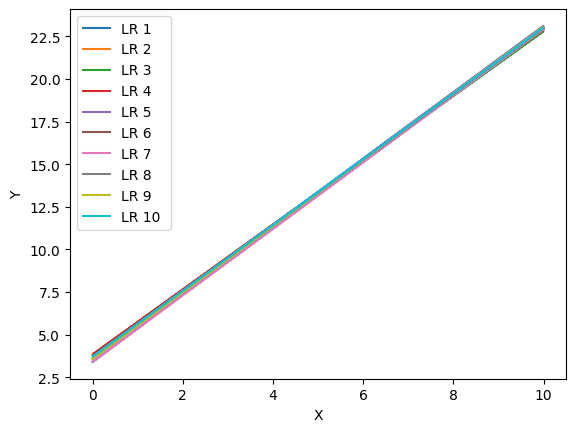

In [12]:
for i in range (10) : # Plotting 10 different instances
    X_train , X_test , Y_train , Y_test = train_test_split (X , Y , test_size =0.2 , random_state = np . random . randint(104) )
    model = LinearRegression ()
    model . fit ( X_train , Y_train )
    Y_pred_train = model . predict ( X_train )
    plt . plot ( X_train , Y_pred_train , label = f'LR {i+1} ')
plt . xlabel ('X')
plt . ylabel ('Y')
plt . legend ()
plt . show ()

3)Linear regression on real world data

In [3]:
!pip install ucimlrepo

In [5]:
# If package not installed , install it using pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
# fetch dataset
infrared_thermography_temperature = fetch_ucirepo (id =925)
# data (as pandas dataframes )
X = infrared_thermography_temperature . data . features
y = infrared_thermography_temperature . data . targets
# metadata
print ( infrared_thermography_temperature . metadata )
# variable information
print ( infrared_thermography_temperature . variables )

{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

1) Load the data

2)

dependent variables-2
independent variables-33

3)

4)


In [6]:
# Combine X and y into a single DataFrame
import pandas as pd
data = pd.concat([X, y], axis=1)


data = data.dropna()


X = data.iloc[:, :-2]
y = data.iloc[:, -2:]




In [ ]:
print(y)

      aveOralF  aveOralM
0        36.85     36.59
1        37.00     37.19
2        37.20     37.34
3        36.85     37.09
4        36.80     37.04
...        ...       ...
1015     36.95     36.99
1016     37.25     37.19
1017     37.35     37.59
1018     37.15     37.29
1019     37.05     37.19

[1018 rows x 2 columns]


5)

In [7]:
y_target = y['aveOralM']

# Step 3: Select independent variables
X_selectedfeatures = ['Age', 'Humidity', 'T_offset1', 'Max1R13_1', 'T_RC1']
X_selected=X[X_selectedfeatures]


#def age_to_midpoint(age_range):
#    if age_range == '>60':
 #     return 60
  #  start, end = map(int, age_range.split('-'))
   # return (start + end) / 2

# Apply the function to the age column
#X_selected['Age'] = X_selected['Age'].apply(age_to_midpoint)

#one hot encoding
X_selected = pd.get_dummies(X_selected, columns=['Age'], prefix='Age')

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_target, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
# Step 5: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: List the estimated coefficients
coefficients = model.coef_
for feature, coef in zip(X_selected.columns, coefficients):
    print(f"Coefficient for {feature}: {coef}")

intercept = model.intercept_
print(f"Intercept: {intercept}")

Coefficient for Humidity: 0.0015317482200953463
Coefficient for T_offset1: -0.10179089614957075
Coefficient for Max1R13_1: -0.3101001403904479
Coefficient for T_RC1: 1.0584237002627388
Coefficient for Age_18-20: -0.1499026897232954
Coefficient for Age_21-25: -0.09707468098772418
Coefficient for Age_21-30: -0.007136324850578268
Coefficient for Age_26-30: -0.09769721669579694
Coefficient for Age_31-40: -0.13637111538609853
Coefficient for Age_41-50: 0.04680746744059978
Coefficient for Age_51-60: -0.06961041750574228
Coefficient for Age_>60: 0.5109849777086363
Intercept: 10.501230392232824


9)

In [8]:
y_target = y['aveOralM']

# Step 3: Select independent variables
print(X)
X_selectedfeatures = ['T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1']
X_selected=X[X_selectedfeatures]

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_target, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
# Step 5: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: List the estimated coefficients
coefficients = model.coef_
for feature, coef in zip(X_selected.columns, coefficients):
    print(f"Coefficient for {feature}: {coef}")

intercept = model.intercept_
print(f"Intercept: {intercept}")


      Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0       Male  41-50                      White   24.0      28.0       0.8   
1     Female  31-40  Black or African-American   24.0      26.0       0.8   
2     Female  21-30                      White   24.0      26.0       0.8   
3     Female  21-30  Black or African-American   24.0      27.0       0.8   
4       Male  18-20                      White   24.0      27.0       0.8   
...      ...    ...                        ...    ...       ...       ...   
1015  Female  21-25                      Asian   25.7      50.8       0.6   
1016  Female  21-25                      White   25.7      50.8       0.6   
1017  Female  18-20  Black or African-American   28.0      24.3       0.6   
1018    Male  26-30            Hispanic/Latino   25.0      39.8       0.6   
1019  Female  18-20                      White   23.8      45.6       0.6   

      T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHCC1  T_FHRC1  

10)

In [12]:
import numpy as np

y_pred = model.predict(X_test)
RSS = np.sum((y_test - y_pred) ** 2)
print(f"Residual Sum of Squares (RSS): {RSS}")

N = len(y_test)
d = X_test.shape[1]
RSE = np.sqrt(RSS / (N - d - 1))
print(f"Residual Standard Error (RSE): {RSE}")

MSE = RSS / N
print(f"Mean Squared Error (MSE): {MSE}")

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² statistic: {r2}")

import statsmodels.api as sm

X_test_sm = sm.add_constant(X_test)  # Adding constant for intercept
model_sm = sm.OLS(y_test, X_test_sm).fit()
standard_errors = model_sm.bse
print("Standard errors for each feature:", standard_errors)

t_statistics = model_sm.tvalues
print("t-statistics for each feature:", t_statistics)

p_values = model_sm.pvalues
print("p-values for each feature:", p_values)


Residual Sum of Squares (RSS): 15.9233997543774
Residual Standard Error (RSE): 0.28287291173396445
Mean Squared Error (MSE): 0.07805588114890882
R² statistic: 0.6076047374475753
Standard errors for each feature: const         1.510164
T_OR1         1.558545
T_OR_Max1     1.559316
T_FHC_Max1    0.089823
T_FH_Max1     0.096804
dtype: float64
t-statistics for each feature: const         7.024985
T_OR1         0.359396
T_OR_Max1    -0.034685
T_FHC_Max1    0.594172
T_FH_Max1     1.873631
dtype: float64
p-values for each feature: const         3.322486e-11
T_OR1         7.196801e-01
T_OR_Max1     9.723656e-01
T_FHC_Max1    5.530717e-01
T_FH_Max1     6.244719e-02
dtype: float64
